In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from funciones_aux import imprimir_resultados, guardar_resultado_en_csv, RUTA_TRAIN, RUTA_TEST

In [2]:
df_train = pd.read_csv(RUTA_TRAIN)
df_test = pd.read_csv(RUTA_TEST)

In [3]:
df_train["sentimiento"] = df_train["sentimiento"].map({"positivo": 1, "negativo": 0})

In [4]:
RUTA_GUARDADO = "RED.csv"

In [5]:
df_train.head(5)

,Unnamed: 0,ID,review_es,sentimiento,idioma_detectado
0,0,0,Uno de los otros críticos ha mencionado que de...,1,es
1,1,1,Una pequeña pequeña producción.La técnica de f...,1,es
2,2,2,Pensé que esta era una manera maravillosa de p...,1,es
3,3,3,"Básicamente, hay una familia donde un niño peq...",0,es
4,4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",1,es


In [6]:
total_reviews = df_train["review_es"].astype(str)
total_labels = df_train["sentimiento"].values

In [7]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Entrenamiento")
    plt.plot(history.history["val_accuracy"], label="Validación")
    plt.title("Precisión del Modelo")
    plt.xlabel("Épocas")
    plt.ylabel("Precisión")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Entrenamiento")
    plt.plot(history.history["val_loss"], label="Validación")
    plt.title("Pérdida del Modelo")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.legend()

    plt.show()

In [8]:
Y_data = df_train.sentimiento

In [9]:
max_words = 5000
max_len = 100

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

2024-06-17 12:11:30.183385: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 12:11:30.643653: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 12:11:31.396947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 12:11:32.974951: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
tokenizer_obj = Tokenizer(num_words = max_words)
tokenizer_obj.fit_on_texts(total_reviews)

In [12]:
X_data_tokens = tokenizer_obj.texts_to_sequences(total_reviews)

In [13]:
X_data_count = tokenizer_obj.sequences_to_matrix(X_data_tokens, mode = "count")

In [14]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_data_count, Y_data, test_size = 0.3, random_state = 123)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model_count = Sequential()
model_count.add(Dense(100, activation="relu", input_shape=(5000,)))
model_count.add(Dense(25, activation="relu"))
model_count.add(Dense(1, activation="sigmoid"))

model_count.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

/home/taiel/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history_count = model_count.fit(X_train_count, y_train_count, batch_size = 256, epochs = 15, validation_split=0.3)

Epoch 1/15


2024-06-17 12:12:39.101095: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 472160000 exceeds 10% of free system memory.


91/93 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7434 - loss: 0.5082

2024-06-17 12:12:50.125234: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 202380000 exceeds 10% of free system memory.


93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.7461 - loss: 0.5046 - val_accuracy: 0.8686 - val_loss: 0.3292
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9130 - loss: 0.2327 - val_accuracy: 0.8736 - val_loss: 0.3215
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9338 - loss: 0.1781 - val_accuracy: 0.8670 - val_loss: 0.3493
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9605 - loss: 0.1205 - val_accuracy: 0.8642 - val_loss: 0.3858
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9835 - loss: 0.0666 - val_accuracy: 0.8610 - val_loss: 0.4577
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9944 - loss: 0.0331 - val_accuracy: 0.8605 - val_loss: 0.5259
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9990 - loss: 0.0125 - val_accuracy: 0.8615 - val_loss: 0.5675
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9997 - loss: 0.0052 - val_accuracy: 0.8596 - val_loss: 0

In [18]:
test_loss, test_acc = model_count.evaluate(X_test_count, y_test_count)
print()
print(test_loss, test_acc)

 24/452 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8584 - loss: 0.7464

2024-06-17 12:13:39.937950: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 289100000 exceeds 10% of free system memory.


452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8648 - loss: 0.8714

0.9221797585487366 0.8630231618881226


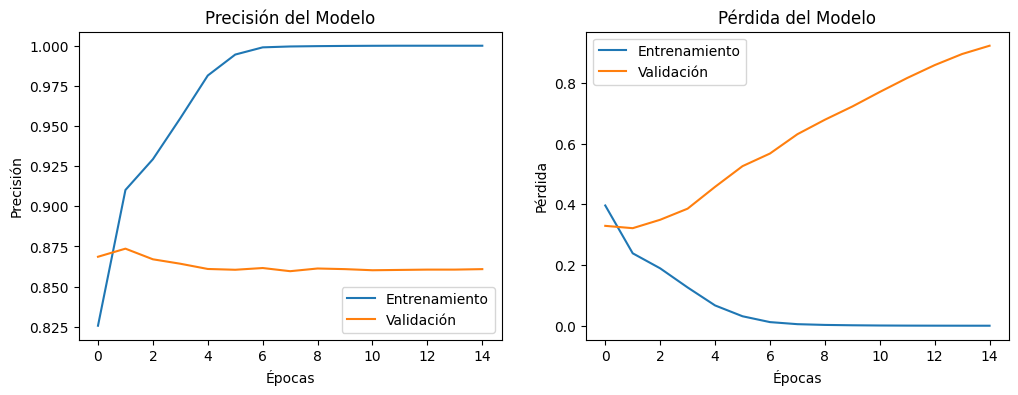

In [19]:
plot_training_history(history_count)

In [20]:
X_train_tokens = tokenizer_obj.texts_to_sequences(df_test["review_es"])
X_train_count = tokenizer_obj.sequences_to_matrix(X_train_tokens, mode = "count")
y_pred = model_count.predict(X_test_count)
y_pred = np.round(y_pred)

  1/452 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step

2024-06-17 12:13:52.024681: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 289100000 exceeds 10% of free system memory.


452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


F1: 0.8620785734187796
Precision: 0.870201096892139
Recall: 0.8541062801932368
Accuracy: 0.8630231753718437


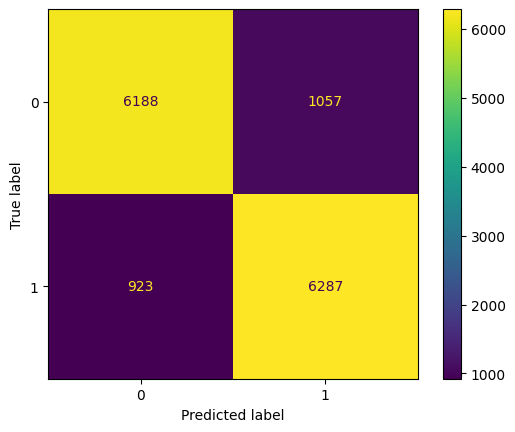

In [21]:
imprimir_resultados(y_test_count, y_pred)

In [22]:
X_test_tokens = tokenizer_obj.texts_to_sequences(df_test["review_es"])
X_test_count = tokenizer_obj.sequences_to_matrix(X_test_tokens, mode = "count")
y_pred = model_count.predict(X_test_count)
y_pred = np.round(y_pred)

 28/269 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

2024-06-17 12:14:02.956237: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 171980000 exceeds 10% of free system memory.


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [23]:
y_pred

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [24]:
y_pred = np.where(y_pred == 0, "negativo", "positivo")

In [25]:
guardar_resultado_en_csv(y_pred.flatten(), df_test, RUTA_GUARDADO)